<a href="https://colab.research.google.com/github/anujott-codes/IOSC-PIMA-INDIAN/blob/main/IOSC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#IOSC PROJECT
#*PIMA-INDIAN DIABETES CLASSIFICATION*

## Project Overview
This project aims to build a **machine learning model** that predicts whether a patient is likely to have diabetes based on diagnostic measurements from the **Pima Indians Diabetes Dataset**.  
The dataset is widely used in medical ML research and contains various health-related features such as glucose levels, BMI, insulin, and blood pressure.

The goal of this project is to:
- Explore and understand the dataset through **EDA (Exploratory Data Analysis)**.  
- Handle missing or invalid data values effectively.  
- Train and evaluate multiple ML models (e.g., **Logistic Regression**, **Random Forest**, **XGBoost**) using **scikit-learn** and **XGBoost**.  
- Compare model performance using key metrics such as **accuracy**, **precision**, **recall**, and **F1-score**.  
- Identify the best-performing model for diabetes prediction.

This project demonstrates practical steps in the **machine learning pipeline** — from data preprocessing to model selection and evaluation — serving as a foundation for future model deployment or experimentation with hyperparameter tuning.

---

**Tech Stack:**  
- Python  
- NumPy, Pandas, Matplotlib, Seaborn  
- Scikit-learn  
- XGBoost


In [31]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataframe
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/IOSC_Project/diabetes.csv"
df = pd.read_csv(path)
print("Dataset Loaded successfully")

Dataset Loaded successfully


In [3]:
#overview of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#shape of the dataset
df.shape

(768, 9)

In [5]:
#Features in our dataset
features = df.columns.to_list()
print(f"{features = }")

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [6]:
#basic info about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#mathematical description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Quality Observations

While inspecting the dataset, several **feature abnormalities** were identified.  
Certain medical attributes contain **zero values**, which are not physiologically possible and indicate **missing or incorrectly recorded data**.  
These anomalies must be treated (e.g., imputation, removal) before model training to prevent bias and incorrect learning.

| Feature | Observation | Explanation |
|----------|--------------|-------------|
| **Glucose** | Contains 0 values | A glucose level of 0 mg/dL is impossible for a living person — represents missing data. |
| **BloodPressure** | Contains 0 values | A diastolic blood pressure of 0 mmHg is not physiologically valid — indicates missing values. |
| **SkinThickness** | Contains 0 values | Skinfold thickness cannot be 0 mm — likely unrecorded or missing measurements. |
| **Insulin** | Contains 0 values | 0 µU/mL insulin concentration is unrealistic — these entries represent missing insulin data. |
| **BMI** | Contains 0 values | Body Mass Index (BMI) cannot be 0 — missing or incorrectly entered values. |

**Conclusion:**  
All these zero values should be treated as **missing data** and imputed appropriately before proceeding to model training.

---



In [8]:
#converting impossible 0 values to nan, so that we impute it later
#number of rows having 0 glucose level -> 5
df[df['Glucose'] == 0].count()[0]

#converting to nan
df['Glucose'] = df['Glucose'].replace(0,np.nan)

In [9]:
#number of rows having 0 blood pressure -> 35
df[df['BloodPressure']==0].count()[0]

#converting to nan
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)

In [10]:
#number of rows having 0 skin thickness -> 227
df[df['SkinThickness']==0].count()[0]

#converting to nan
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)

In [11]:
#number of rows having zero insulin -> 374
df[df['Insulin']==0].count()[0]

#converting to nan
df['Insulin'] = df['Insulin'].replace(0,np.nan)

In [12]:
#number of rows having 0 BMI -> 11
df[df['BMI']==0].count()[0]

#converting to nan
df['BMI'] = df['BMI'].replace(0,np.nan)

In [13]:
#checking number of nan values
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
#checking distribution of numeric columns
def distplot(col, num):
    plt.subplot(2, 4, num)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.3)

#collecting numeric columns
numeric_columns = df.columns.to_list()
numeric_columns.remove('Outcome')
numeric_columns.remove('Pregnancies')

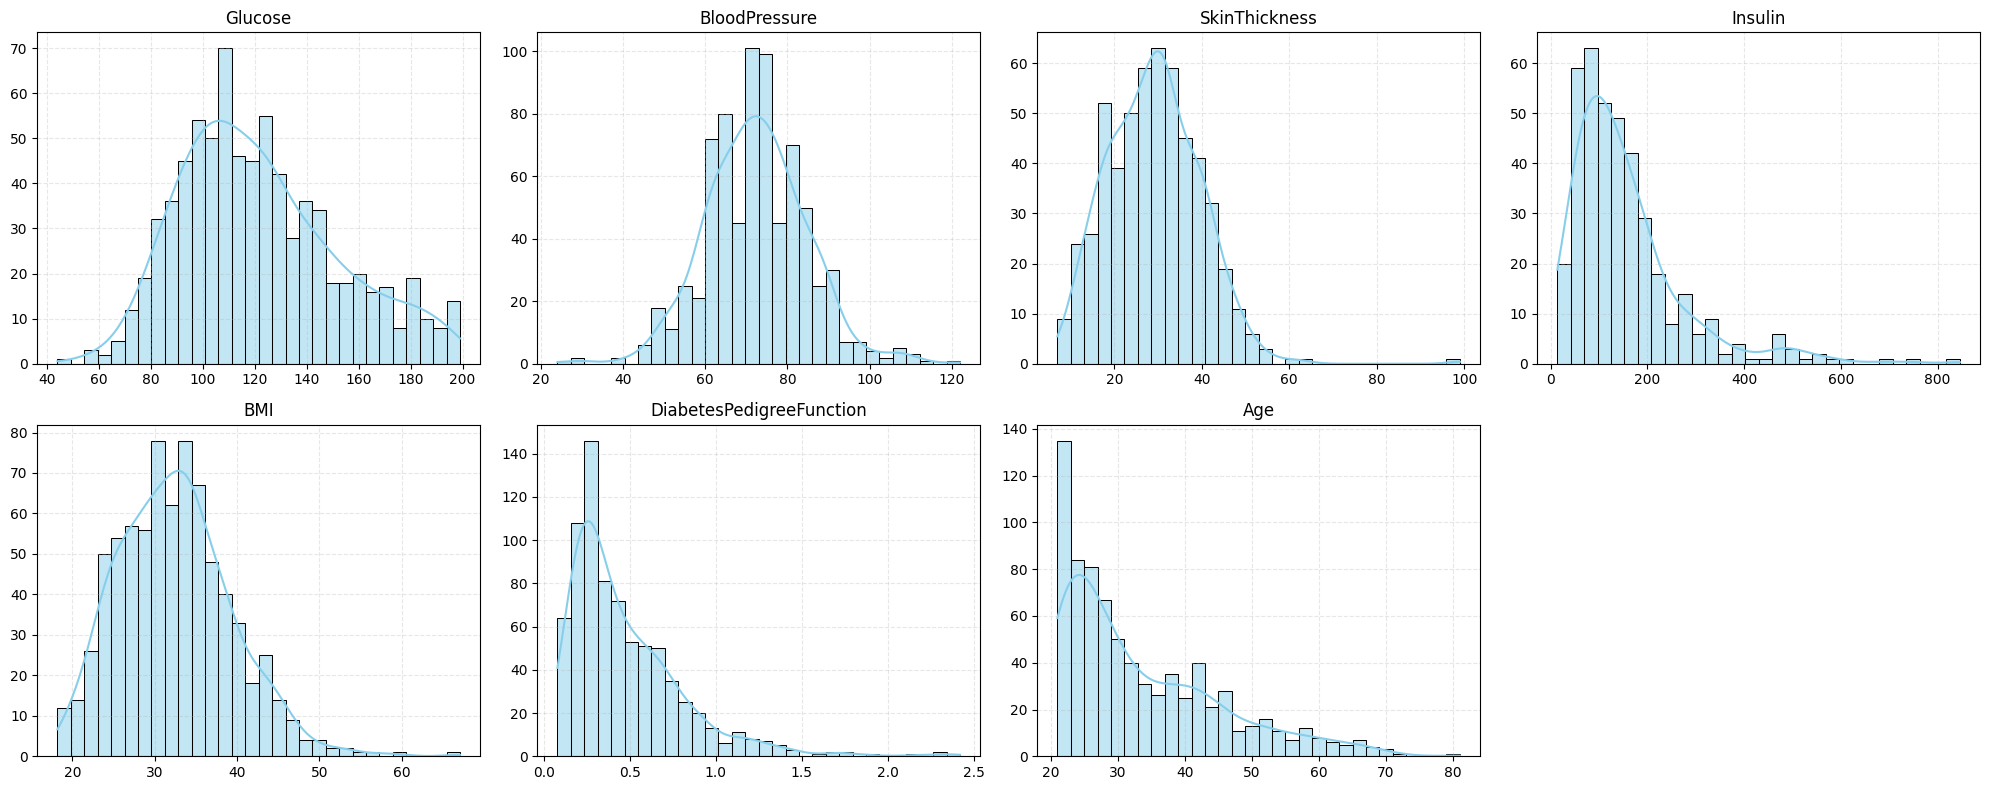

In [15]:
#figure size
plt.figure(figsize=(20,8))

#checking the distribution
for i,col in enumerate(numeric_columns):
  distplot(col,i+1)

plt.tight_layout()
plt.show()

###  Feature Distribution Insights


| Feature | Observation | Interpretation |
|----------|--------------|----------------|
| **SkinThickness** | Right-skewed | Majority of individuals have low skinfold thickness; a few have exceptionally high values. |
| **Insulin** | Highly right-skewed | Most records show low insulin levels, but there are significant outliers representing very high insulin concentrations. |
| **BMI** | Moderately right-skewed | The population is concentrated around lower BMI values, with fewer individuals having high BMI. |
| **DiabetesPedigreeFunction** | Right-skewed | Most individuals have a low genetic predisposition score, with few having a very high risk. |
| **Age** | Right-skewed | Majority of participants are younger; a smaller subset represents older age groups. |

**Conclusion:**  
To reduce the impact of skewness and outliers, **data transformation techniques** may be applied.  

---



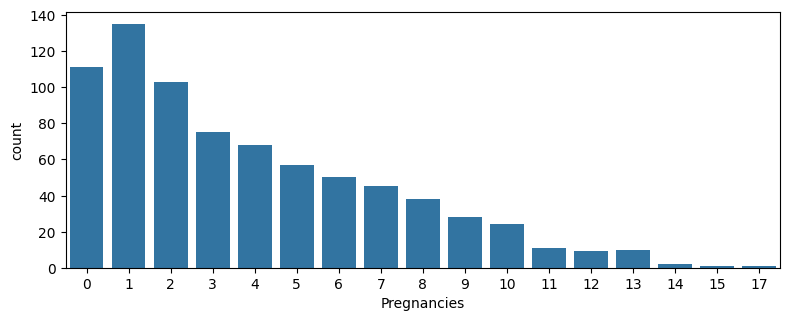

In [16]:
#plotting the countplot for pregnancies
plt.figure(figsize=(8,6))
#Pregnancies
plt.subplot(2,1,1)
sns.countplot(data=df,x='Pregnancies')

plt.tight_layout()
plt.show()

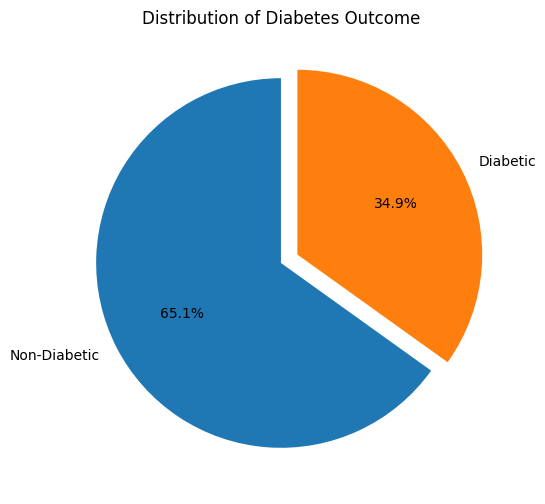

In [17]:
#pieplot for outcome distribution
# Count of each class in Outcome
outcome_counts = df['Outcome'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'],
        autopct='%1.1f%%', startangle=90, explode=(0,0.1))
plt.title('Distribution of Diabetes Outcome')
plt.show()


###  Outcome Distribution

The target variable `Outcome` indicates whether an individual is diabetic (1) or non-diabetic (0).  
A pie chart visualizes the proportion of diabetic vs non-diabetic cases in the dataset.

Observations:
- Most individuals are **non-diabetic**.
- Diabetic cases form a **smaller proportion**, which may need consideration for class imbalance during model training.


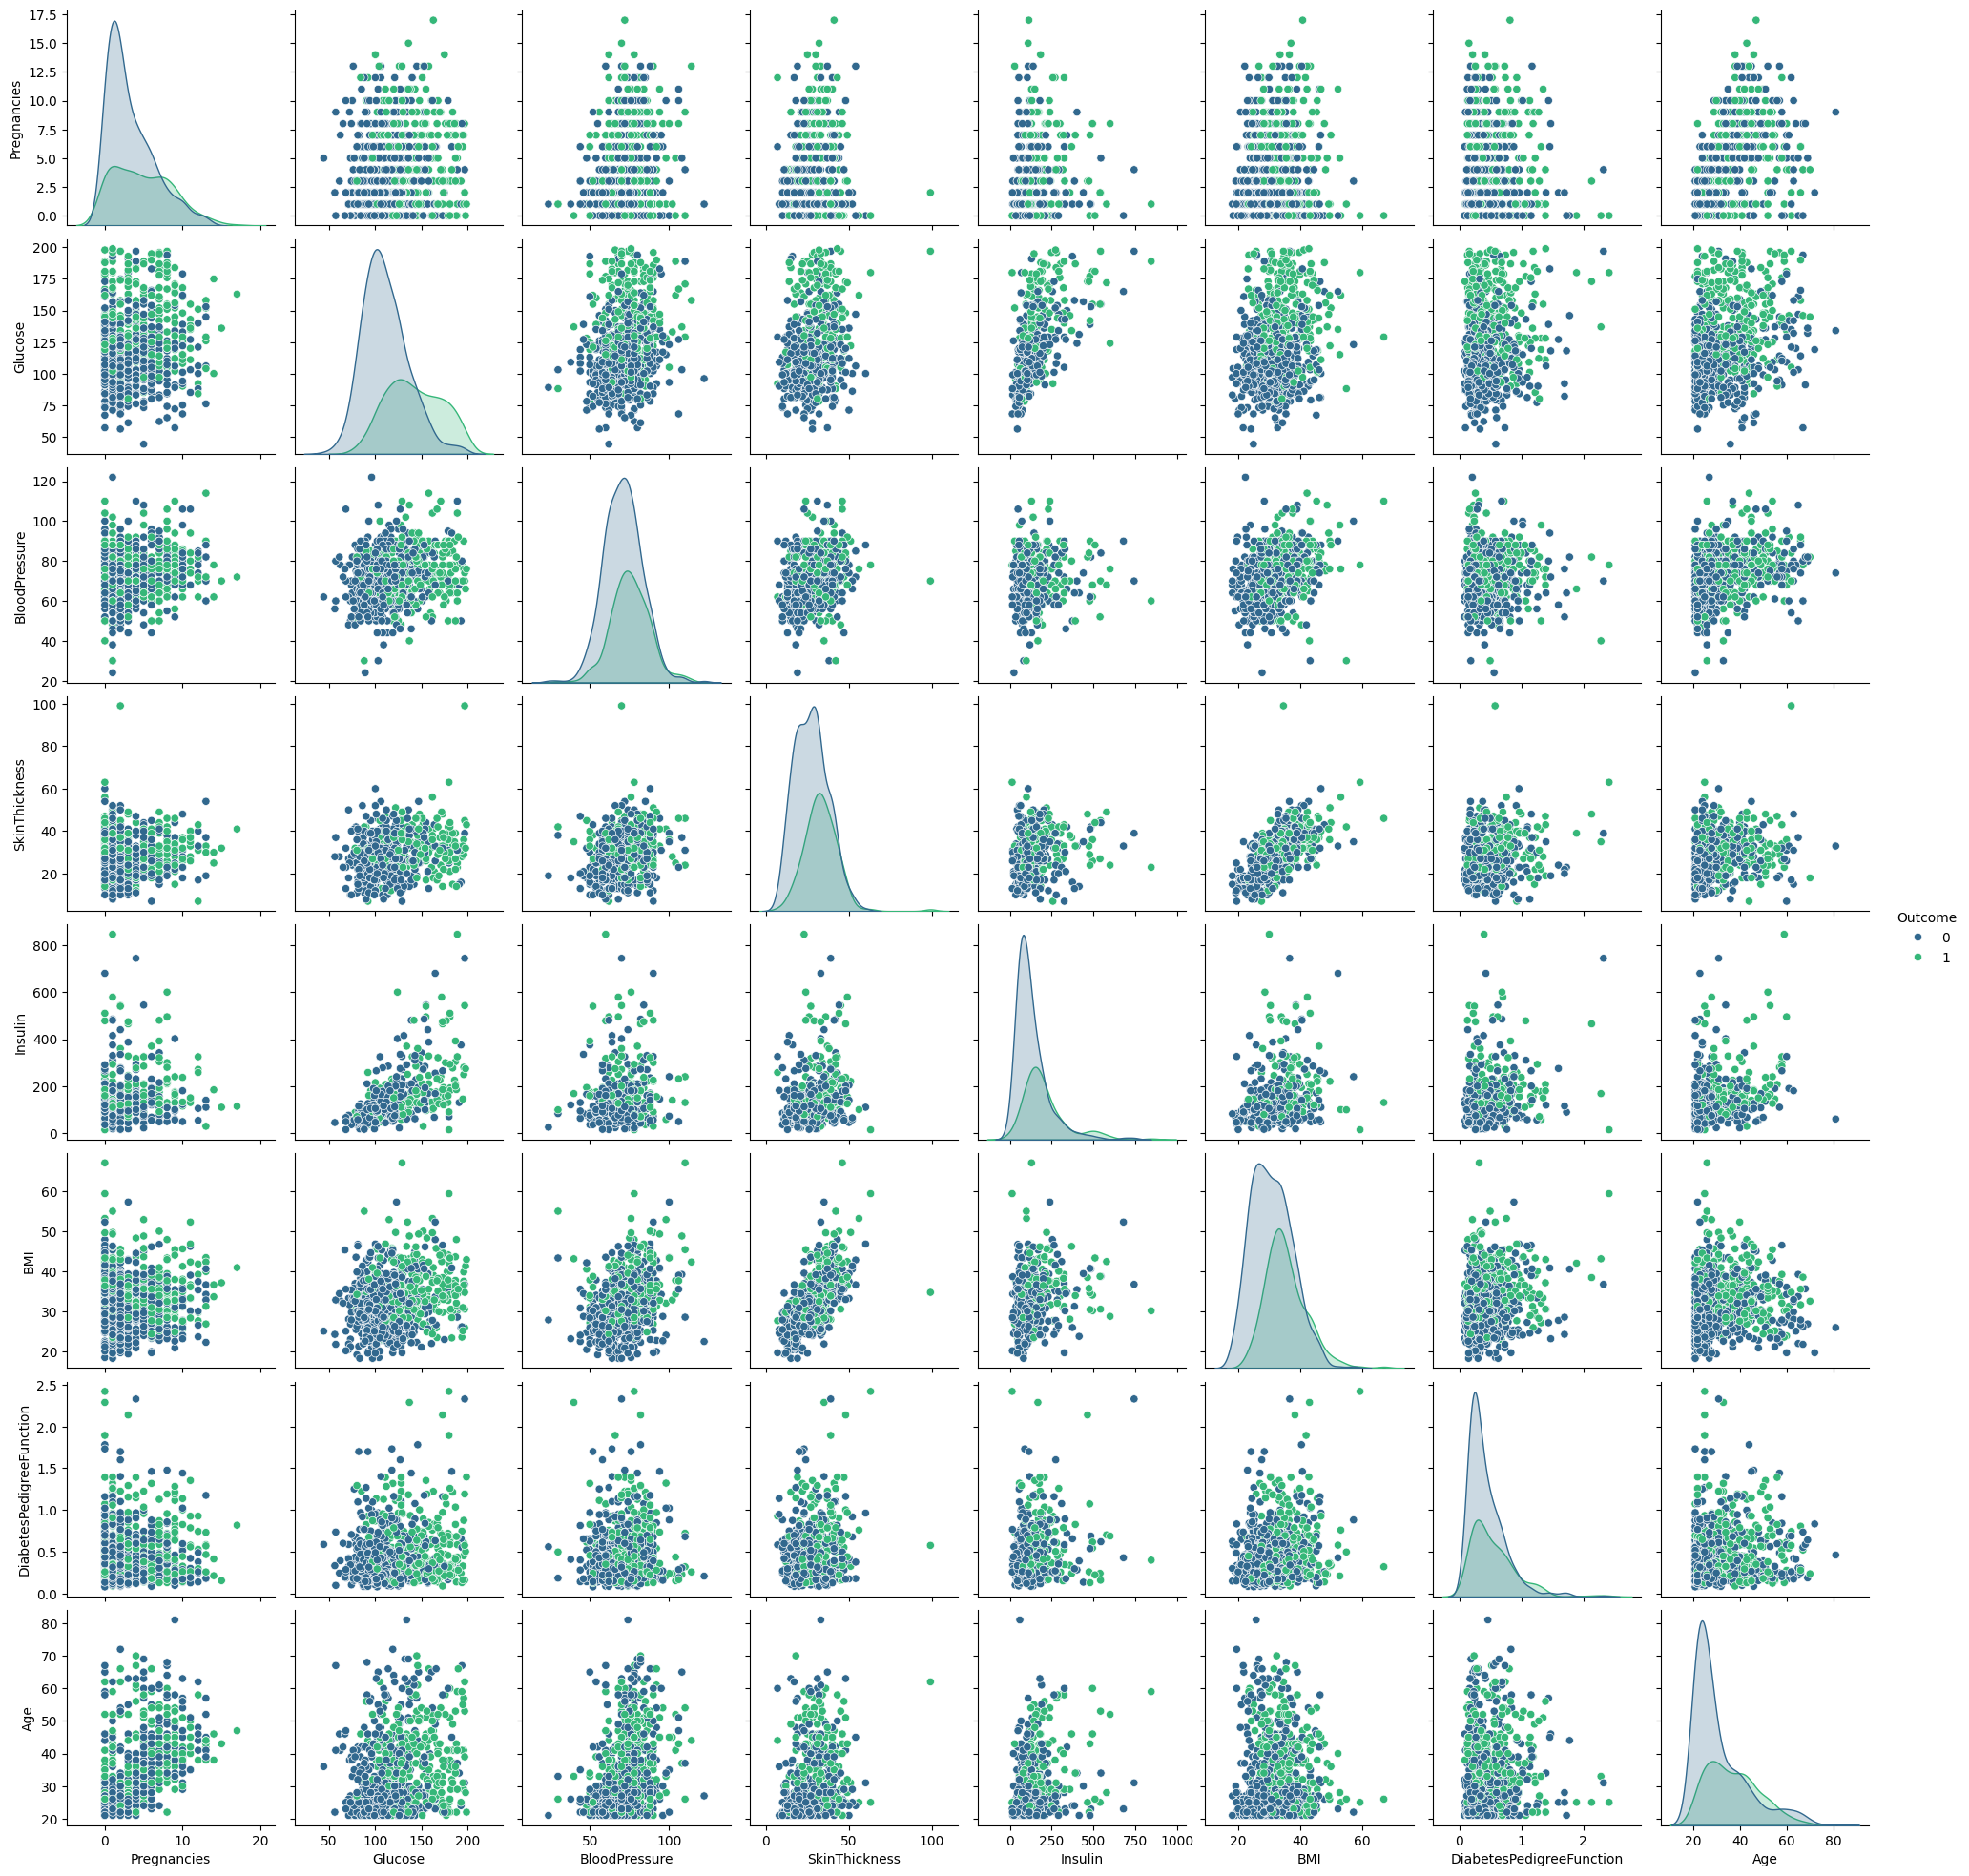

In [18]:
#pairplot
sns.pairplot(data=df,hue='Outcome',palette='viridis')
plt.show()

In [19]:
#function for plotting boxplot for outlier detection
def boxplot(col,num):
  plt.subplot(4,2,num)
  sns.boxplot(data=df,x=col)
  plt.title(f'{col}', fontsize=12)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(True, linestyle='--', alpha=0.3)

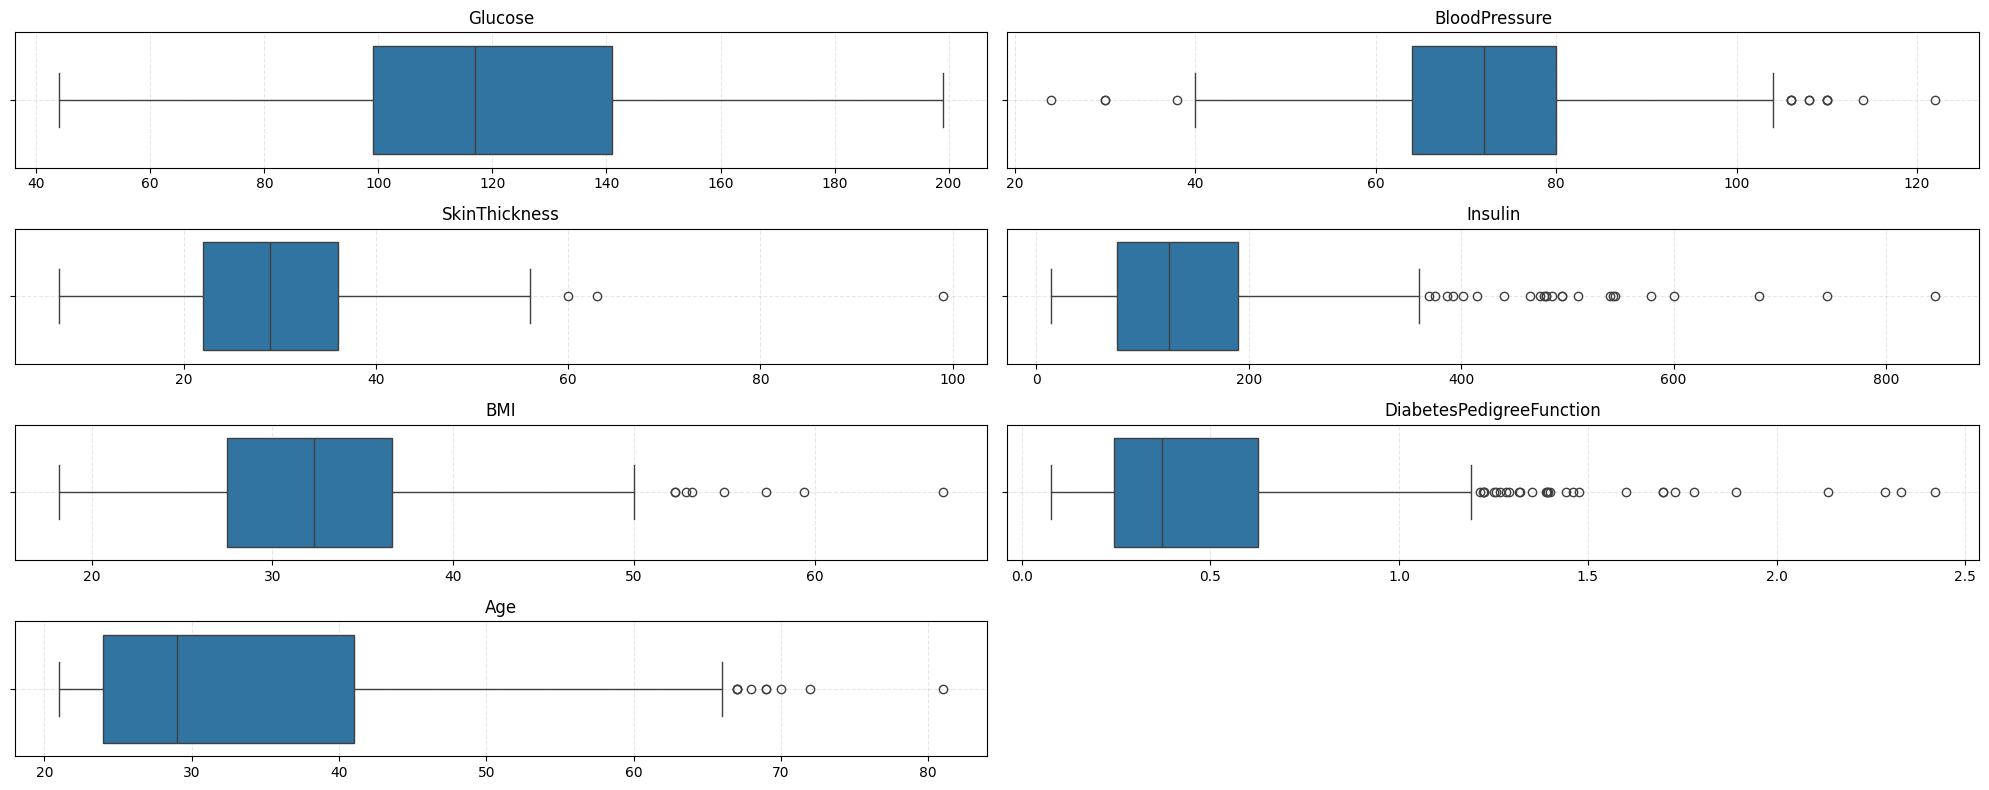

In [20]:
#figure size
plt.figure(figsize=(20,8))

#plotting boxplots to detect outliers
for i,col in enumerate(numeric_columns):
  boxplot(col,i+1)

plt.tight_layout()
plt.show()

In [21]:
#Data Split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [22]:
# Impute missing values (median)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [23]:
# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [24]:
# Function to train and evaluate
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    cm = confusion_matrix(y_test, y_pred)
    return metrics, cm

# Calculate scale_pos_weight for XGBoost
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

# Initialize models with class balancing
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

# Train and evaluate
models = {'Logistic Regression': lr_model,
          'Random Forest': rf_model,
          'XGBoost': xgb_model}

results = {}

for name, model in models.items():
    metrics, cm = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[name] = metrics
    print(f"--- {name} ---")
    print("Metrics:", metrics)
    print("Confusion Matrix:\n", cm)
    print("\n")


--- Logistic Regression ---
Metrics: {'Accuracy': 0.7337662337662337, 'Precision': 0.6031746031746031, 'Recall': 0.7037037037037037, 'F1-Score': 0.6495726495726496}
Confusion Matrix:
 [[75 25]
 [16 38]]


--- Random Forest ---
Metrics: {'Accuracy': 0.7467532467532467, 'Precision': 0.6595744680851063, 'Recall': 0.5740740740740741, 'F1-Score': 0.6138613861386139}
Confusion Matrix:
 [[84 16]
 [23 31]]


--- XGBoost ---
Metrics: {'Accuracy': 0.7467532467532467, 'Precision': 0.6415094339622641, 'Recall': 0.6296296296296297, 'F1-Score': 0.6355140186915887}
Confusion Matrix:
 [[81 19]
 [20 34]]




### Model Comparison and Selection

Three models were trained and evaluated on the Pima Indians Diabetes dataset: **Logistic Regression, Random Forest, and XGBoost**.  
The evaluation metrics include **Accuracy, Precision, Recall, F1-Score**, and the **Confusion Matrix**.

| Model                | Accuracy | Precision | Recall  | F1-Score | Observations |
|----------------------|----------|-----------|---------|----------|--------------|
| Logistic Regression  | 0.734    | 0.603     | 0.704   | 0.650    | High recall → captures most diabetics, but lower precision; more false positives. |
| Random Forest        | 0.747    | 0.660     | 0.574   | 0.614    | High precision → fewer false positives, but low recall; misses many diabetics. |
| XGBoost              | 0.747    | 0.641     | 0.630   | 0.636    | Balanced performance → moderate recall and precision; best F1-Score among the three. |

### Conclusion

While Logistic Regression has the **highest recall**, it generates more false positives. Random Forest has high precision but **fails to identify many actual diabetics**.  

**XGBoost** provides the **best balance between precision and recall**, achieving the highest F1-Score.  
> Therefore, **XGBoost is chosen as the final model**, ensuring a good trade-off between capturing true positives (diabetics) and limiting false alarms.


In [25]:
#hyper-parameter tuning for xgboost
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best F1-Score: 0.701907286161013


In [26]:
#getting the best xgb model
best_xgb_model = grid_search.best_estimator_

In [27]:
#evaluating the best model
metrics, cm = evaluate_model(best_xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(f"--- Best XGB Model ---")
print("Metrics:", metrics)

--- Best XGB Model ---
Metrics: {'Accuracy': 0.7467532467532467, 'Precision': 0.6056338028169014, 'Recall': 0.7962962962962963, 'F1-Score': 0.688}


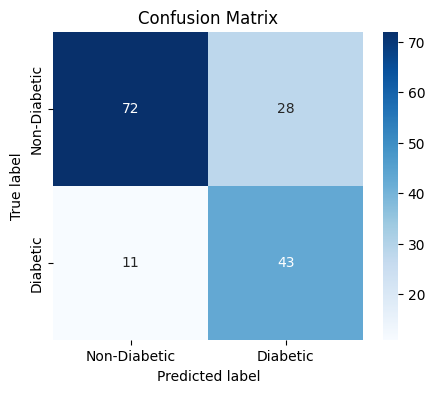

In [30]:
#plotting confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic','Diabetic'], yticklabels=['Non-Diabetic','Diabetic'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [32]:
#saving the model
joblib.dump(best_xgb_model,'model.pkl')

['model.pkl']